### Transfer Learning: Leveraging Pre-trained CNNs for New Tasks

Convolutional Neural Networks (CNNs) are meticulously designed architectures, a result of years of experimentation and expertise. However, adapting these sophisticated models to new tasks without starting from scratch is a challenge. **Transfer learning** offers a solution by leveraging the knowledge learned from pre-trained CNNs, especially those trained on vast databases like ImageNet.

#### **Understanding Pre-trained CNNs:**
- **Hierarchy of Filters:** Filters in a CNN's layers are organized hierarchically.
- **Early Layers:** Detect basic features like edges and colors, universally useful in any dataset.
- **Later Layers:** Specialized filters identify specific objects (e.g., birds, wheels) based on the training dataset.
- **Challenge:** Utilizing pre-trained knowledge for new tasks, even when the datasets have no overlap with the original categories.

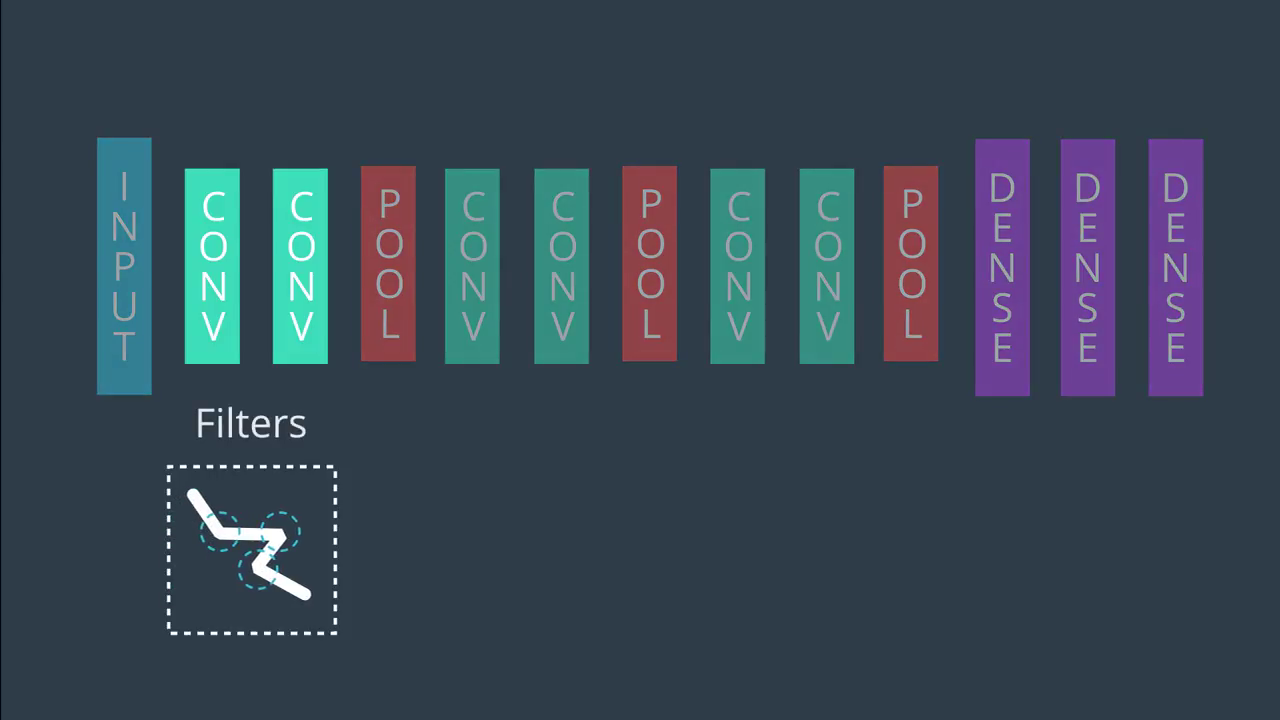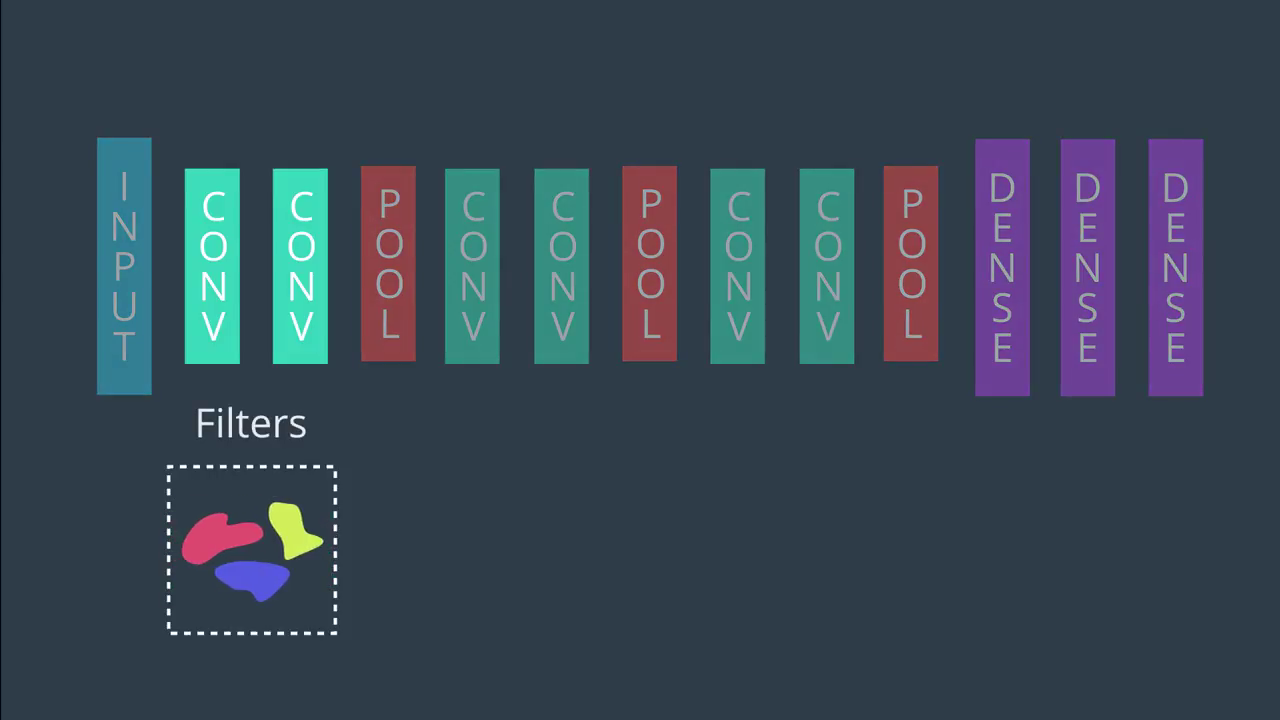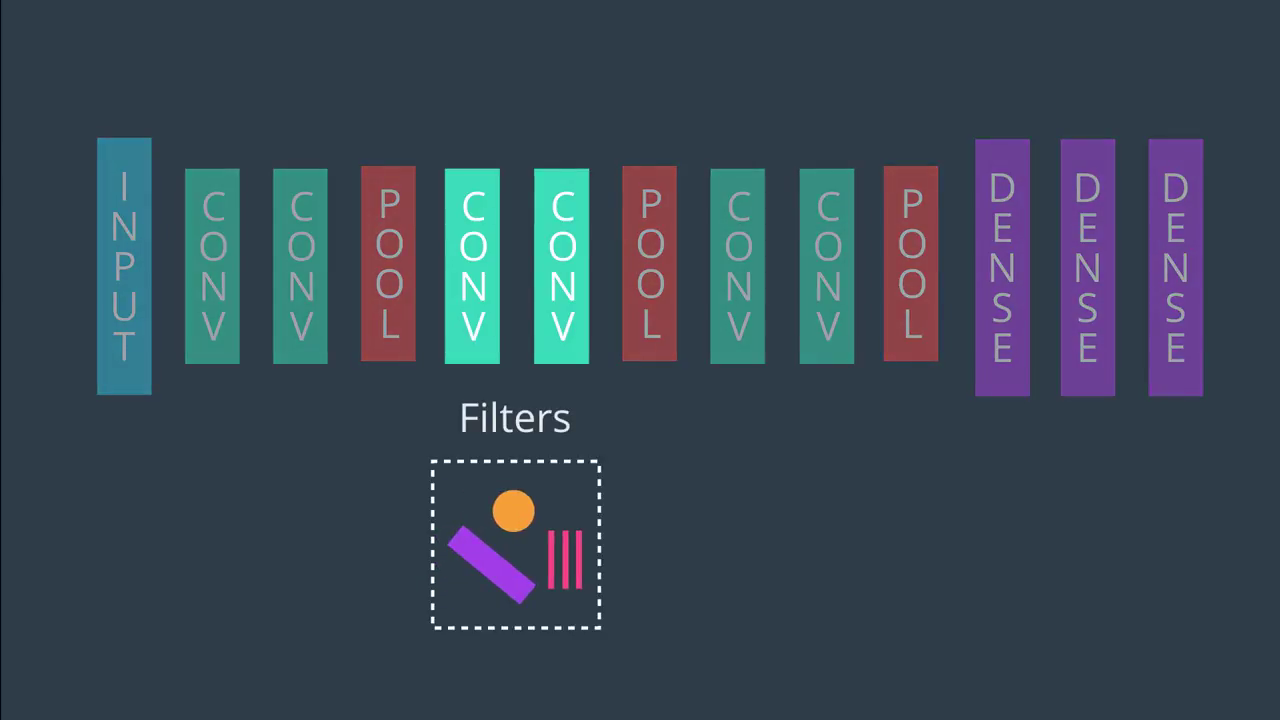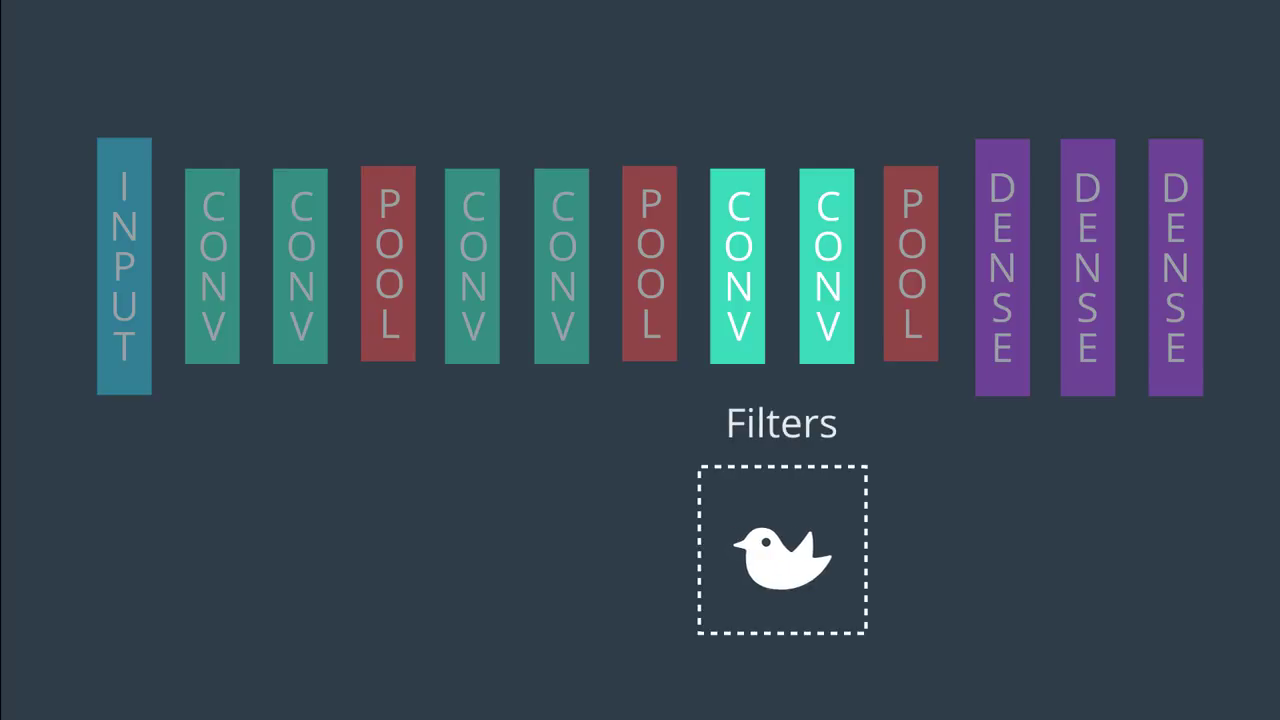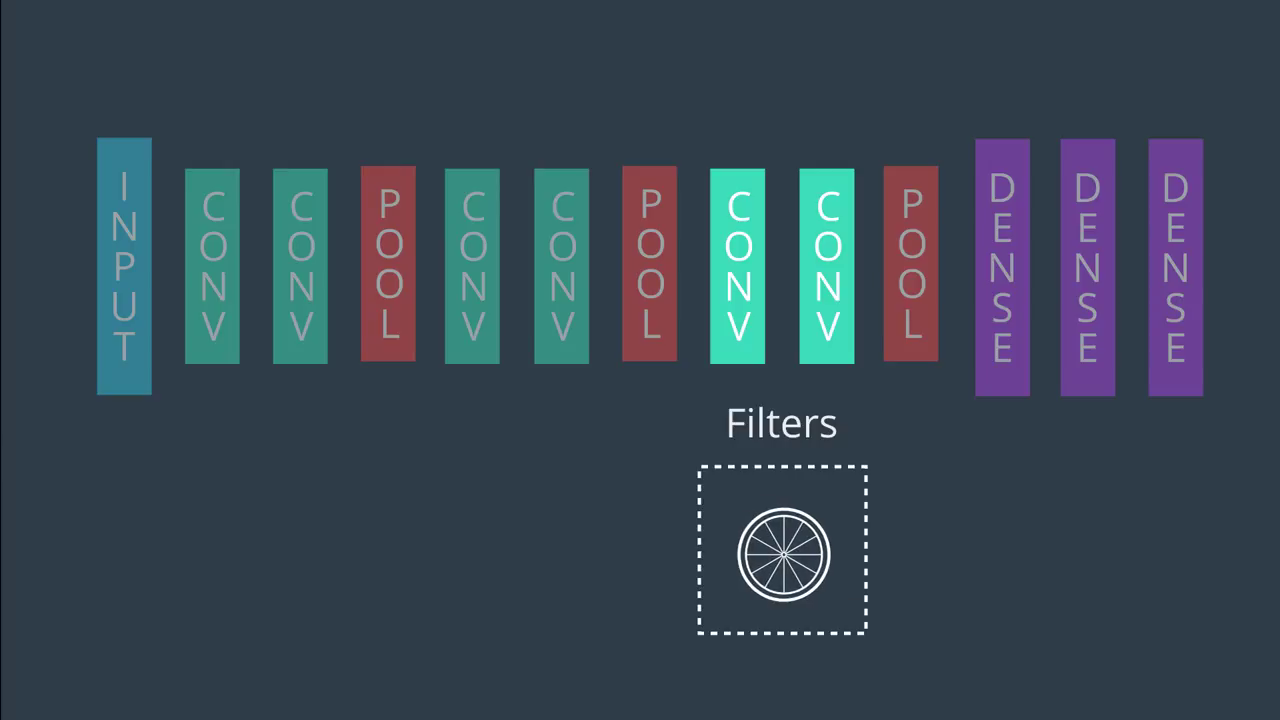


#### **Adapting Pre-trained CNNs:**
- **Technique:** Remove the highly specific final layers while retaining earlier general layers.
- **Fine-tuning:** Add new layers for the specific task and train only these final layers.
- **Considerations:** Adaptation method depends on dataset size and similarity to ImageNet.
- **Example:** Stanford's team used transfer learning with an Inception architecture pre-trained on ImageNet for skin cancer diagnosis.
- **Process:** Removed final classification layer, added a new layer for disease classes, and fine-tuned parameters for the specific dataset.
- **Benefit:** Leveraging pre-training provided a head start, especially useful for large, distinct datasets.

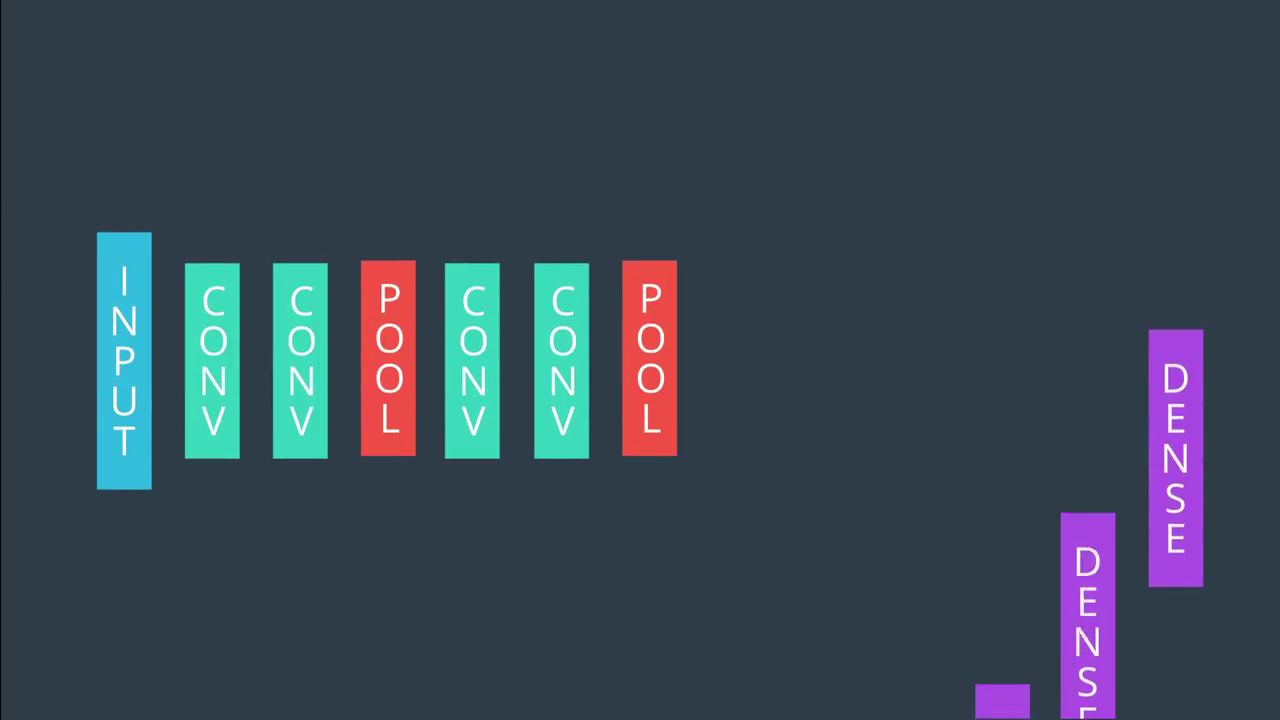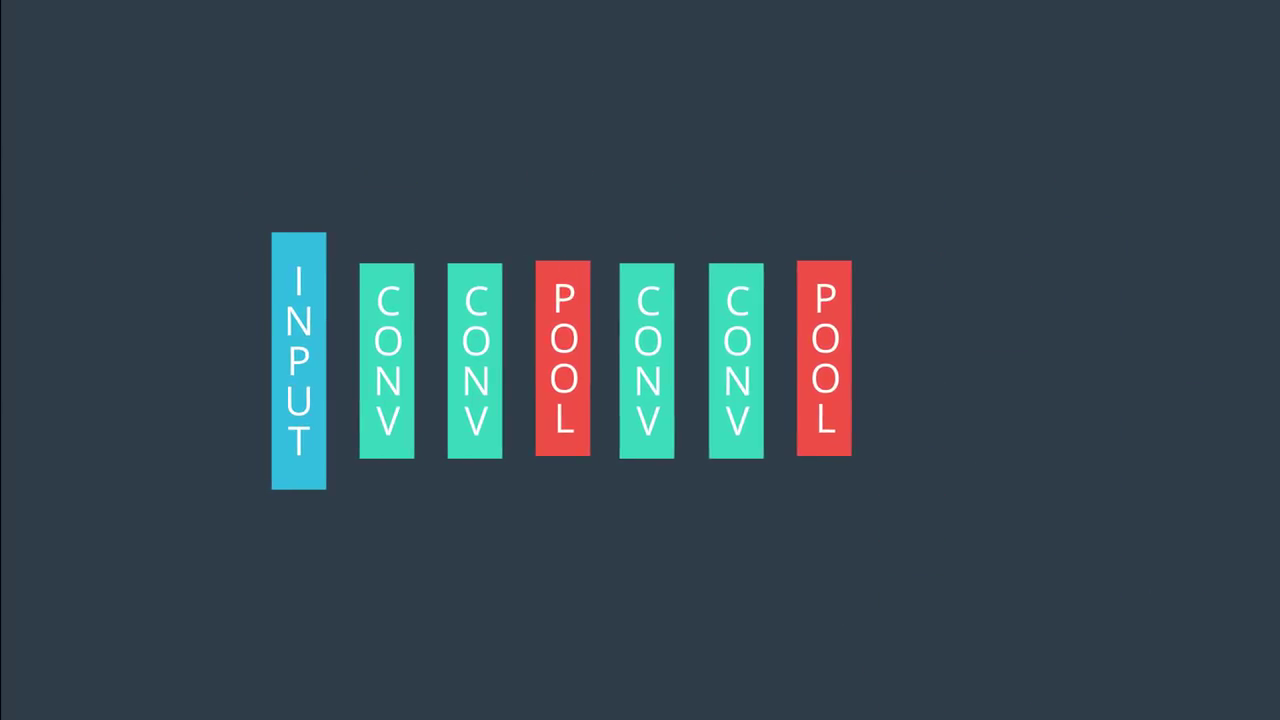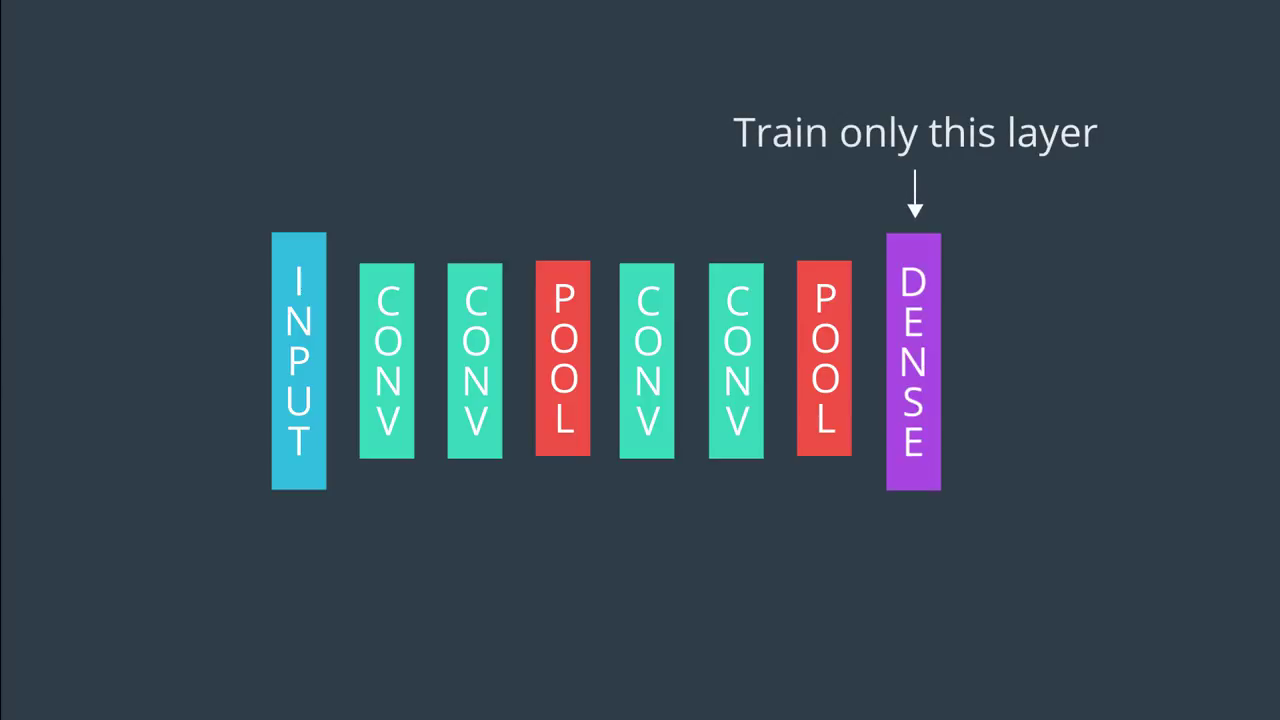


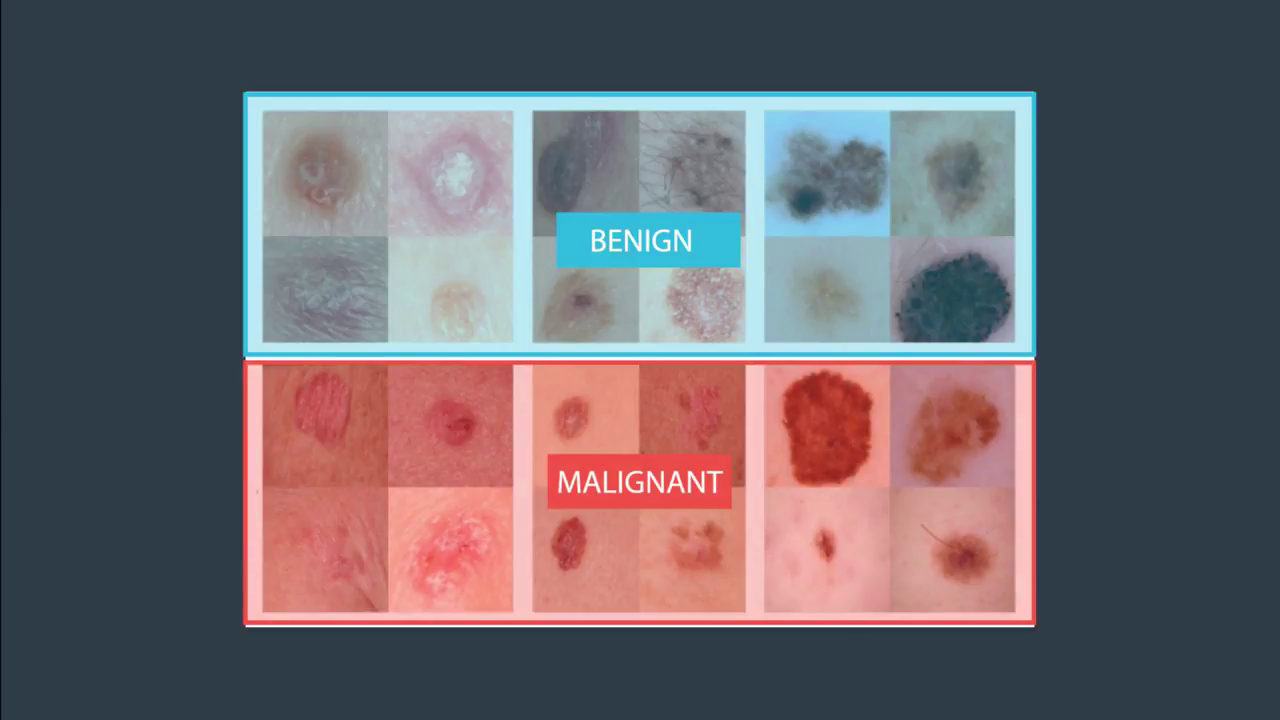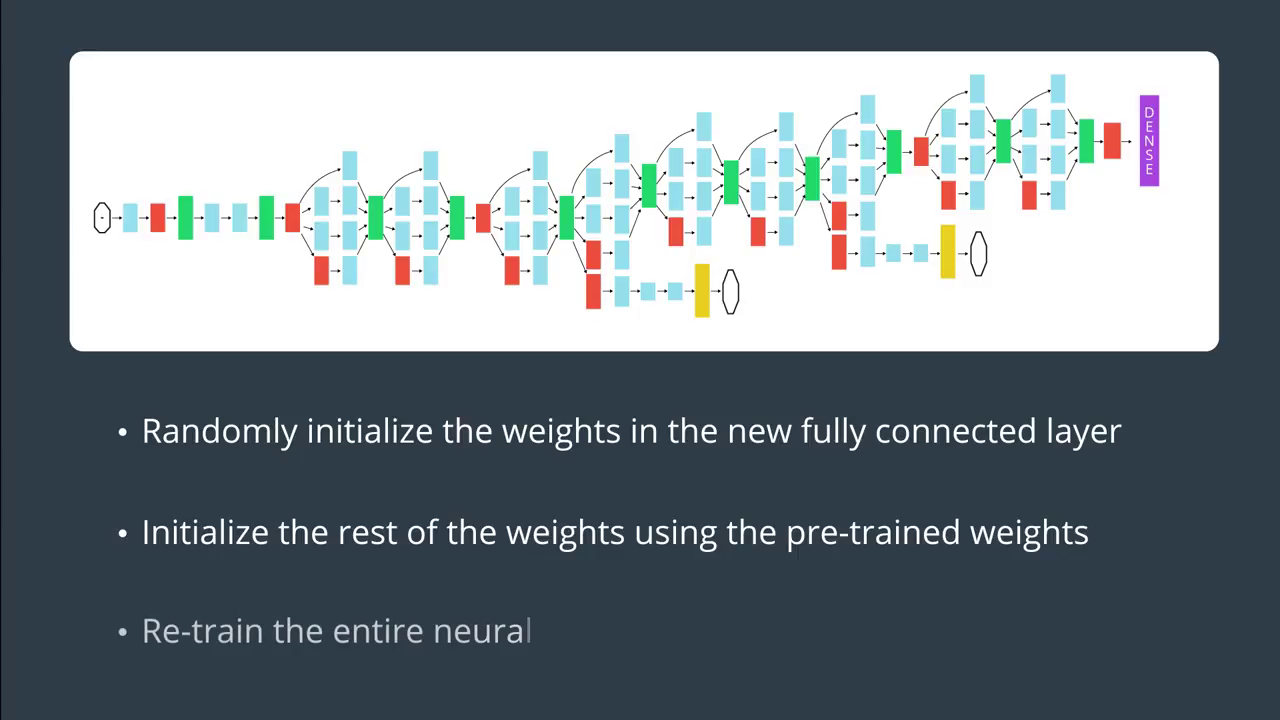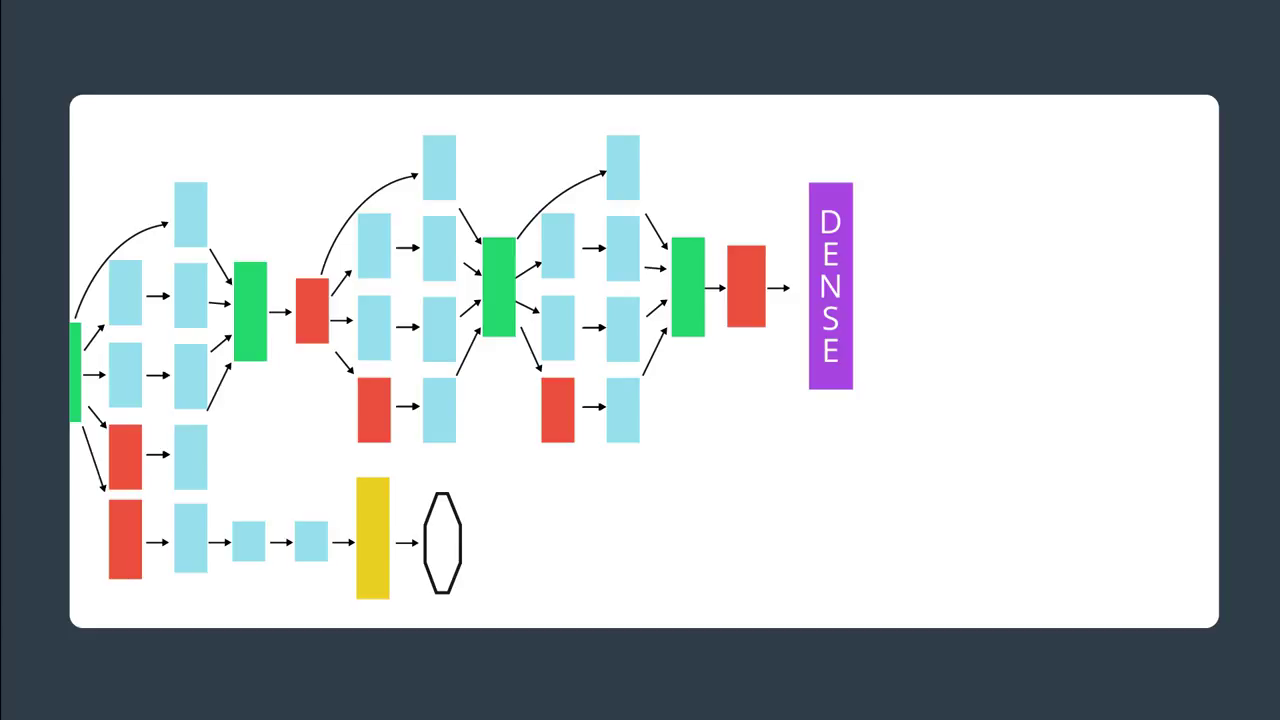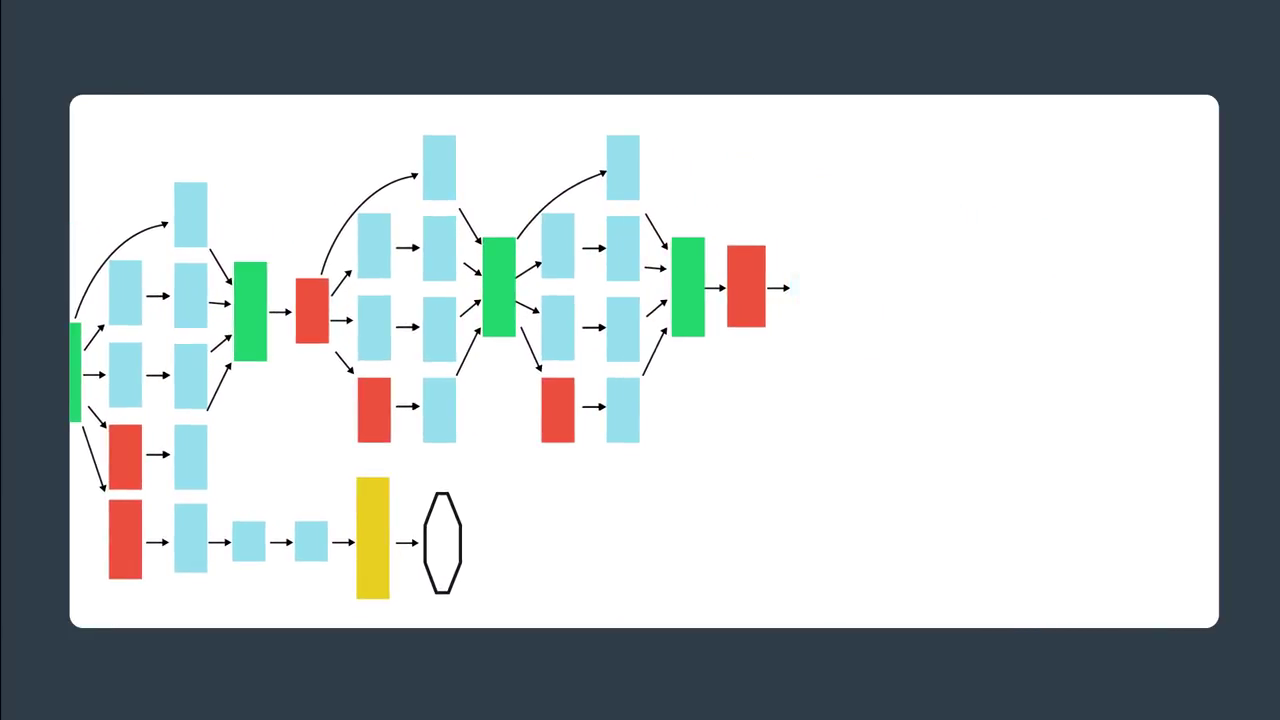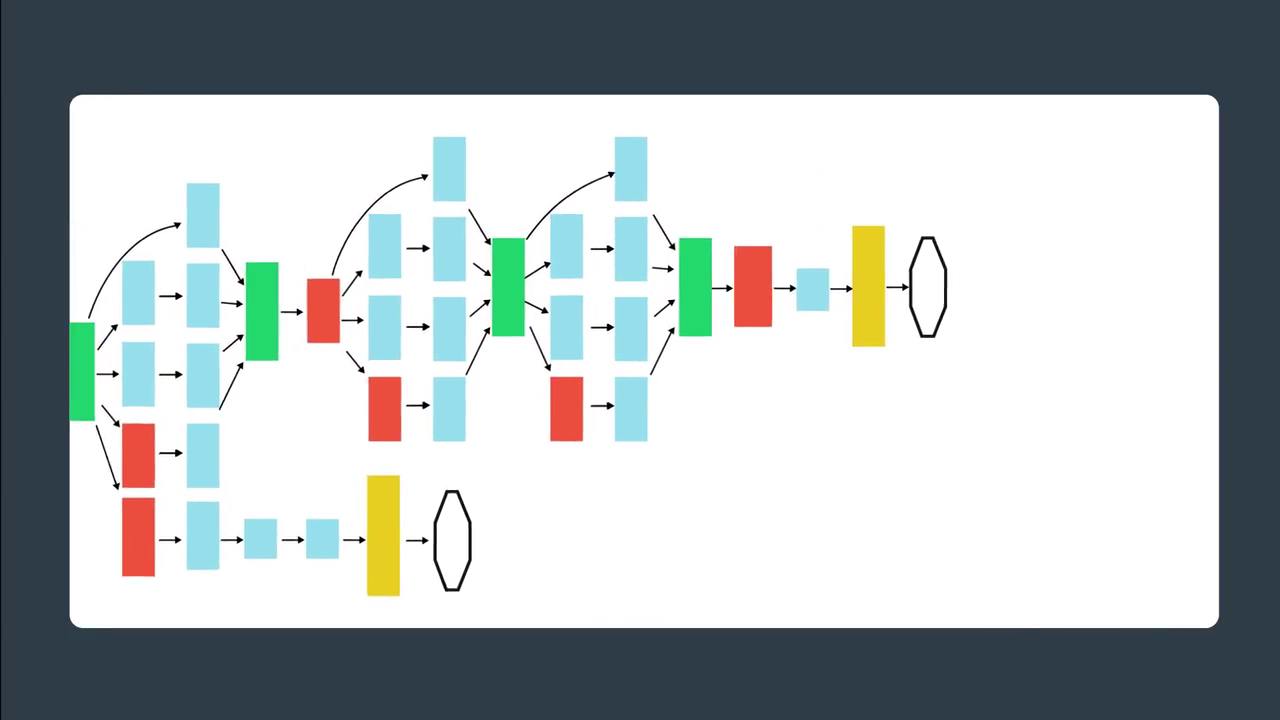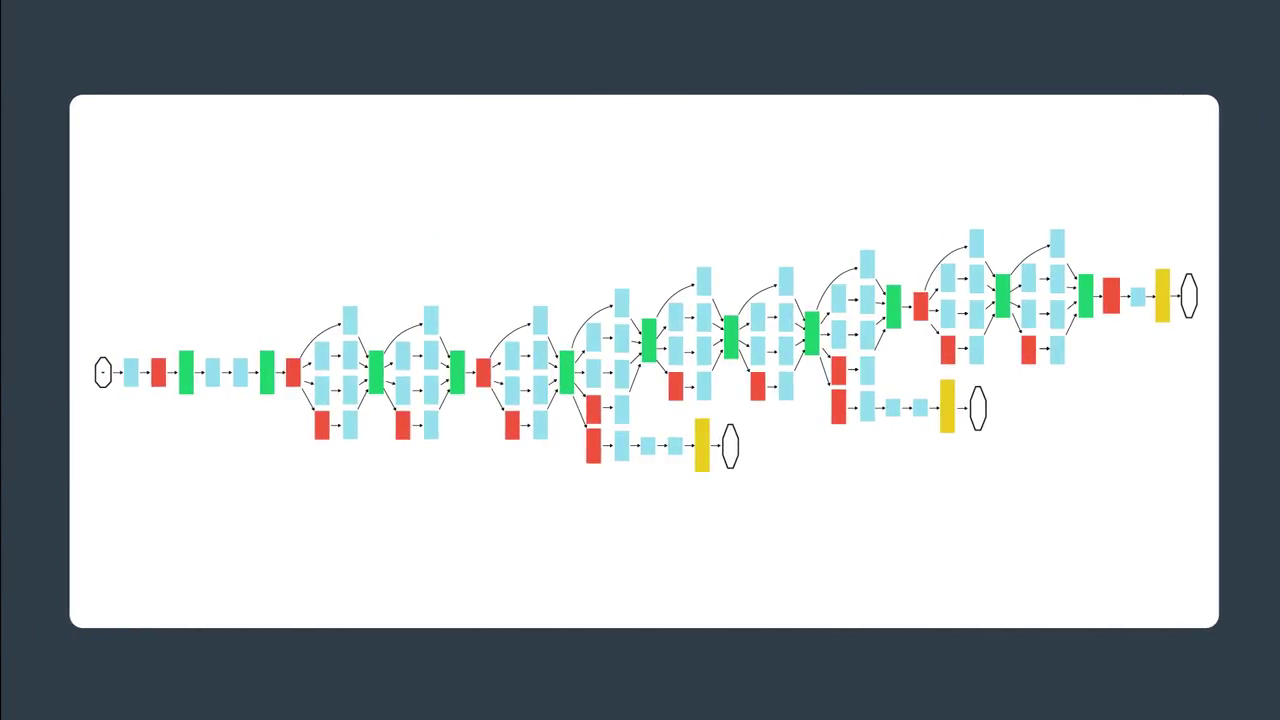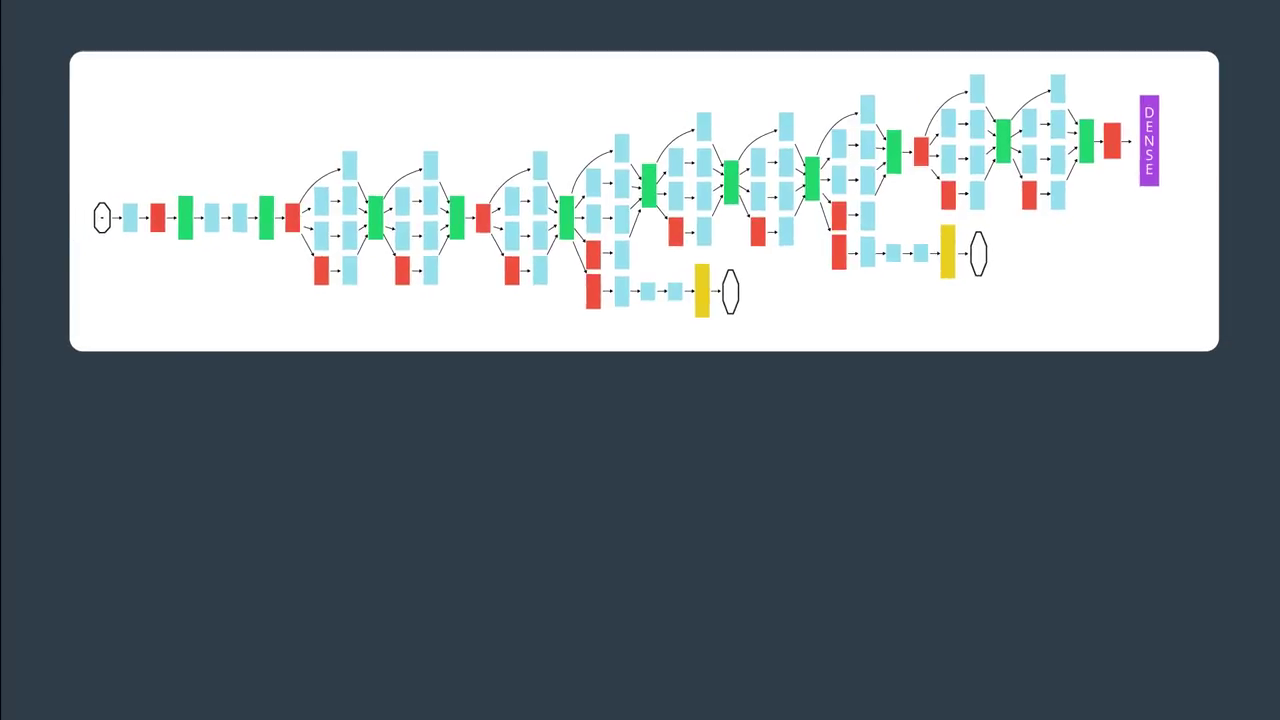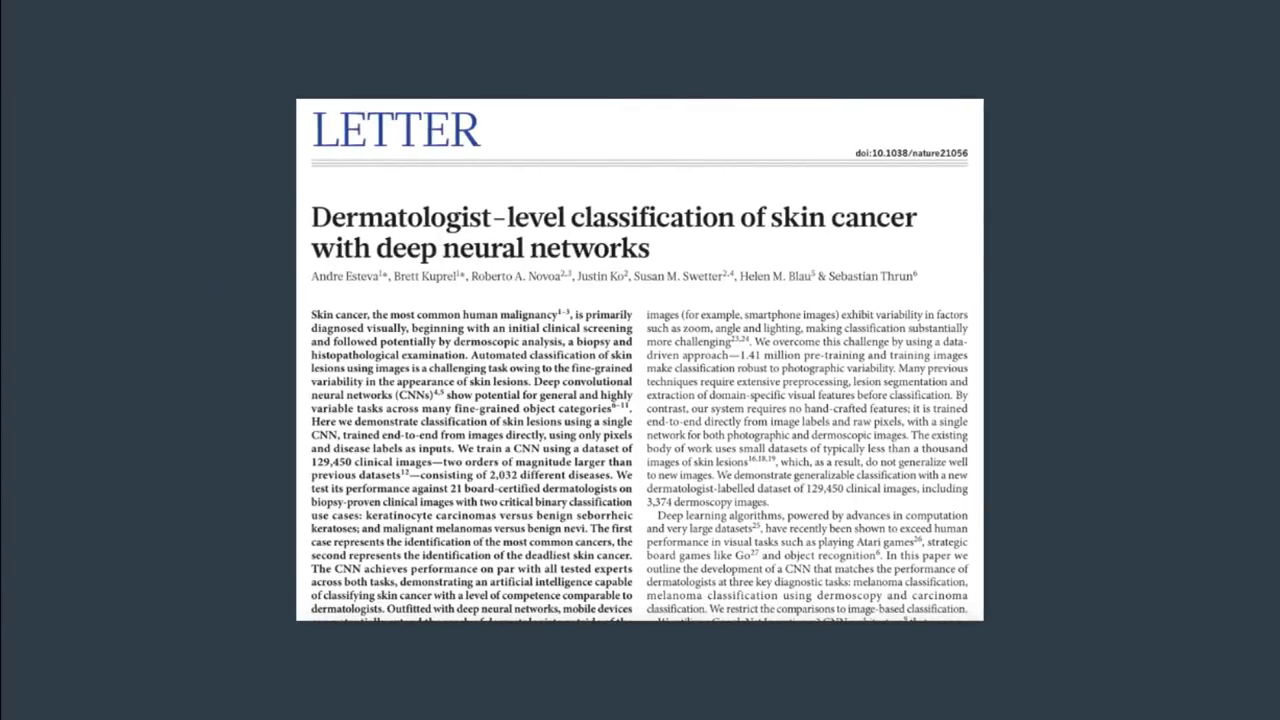


Transfer learning, coupled with fine-tuning, proves invaluable for harnessing the power of pre-trained CNNs in diverse, real-world applications, enabling superior performance in tasks like medical diagnosis.

*Unlock the potential of pre-trained CNNs; adapt, fine-tune, and revolutionize various domains with the power of transfer learning!*


25\. Transfer Learning
======================

### 

   

Transfer Learning
=================

Transfer learning involves taking a pre-trained neural network and adapting the neural network to a new, different data set.

Depending on both:

*   the size of the new data set, and
*   the similarity of the new data set to the original data set

the approach for using transfer learning will be different. There are four main cases:

1.  new data set is small, new data is similar to original training data
2.  new data set is small, new data is different from original training data
3.  new data set is large, new data is similar to original training data
4.  new data set is large, new data is different from original training data

![Four Cases when Using Transfer Learning](img/02-guide-how-transfer-learning-v3-01.png)

Four Cases when Using Transfer Learning

A large data set might have one million images. A small data could have two-thousand images. The dividing line between a large data set and small data set is somewhat subjective. Overfitting is a concern when using transfer learning with a small data set.

Images of dogs and images of wolves would be considered similar; the images would share common characteristics. A data set of flower images would be different from a data set of dog images.

Each of the four transfer learning cases has its own approach. In the following sections, we will look at each case one by one.

### Demonstration Network

To explain how each situation works, we will start with a generic pre-trained convolutional neural network and explain how to adjust the network for each case. Our example network contains three convolutional layers and three fully connected layers:

![General Overview of a Neural Network](img/02-guide-how-transfer-learning-v3-02.png)

General Overview of a Neural Network

Here is an generalized overview of what the convolutional neural network does:

*   the first layer will detect edges in the image
*   the second layer will detect shapes
*   the third convolutional layer detects higher level features

Each transfer learning case will use the pre-trained convolutional neural network in a different way.

### Case 1: Small Data Set, Similar Data

![Case 1: Small Data Set with Similar Data](img/02-guide-how-transfer-learning-v3-03.png)

Case 1: Small Data Set with Similar Data

If the new data set is small and similar to the original training data:

*   slice off the end of the neural network
*   add a new fully connected layer that matches the number of classes in the new data set
*   randomize the weights of the new fully connected layer; freeze all the weights from the pre-trained network
*   train the network to update the weights of the new fully connected layer

To avoid overfitting on the small data set, the weights of the original network will be held constant rather than re-training the weights.

Since the data sets are similar, images from each data set will have similar higher level features. Therefore most or all of the pre-trained neural network layers already contain relevant information about the new data set and should be kept.

Here's how to visualize this approach:

![Neural Network with Small Data Set, Similar Data](img/02-guide-how-transfer-learning-v3-04.png)

Neural Network with Small Data Set, Similar Data

### Case 2: Small Data Set, Different Data

![Case 2: Small Data Set, Different Data](img/02-guide-how-transfer-learning-v3-05.png)

Case 2: Small Data Set, Different Data

If the new data set is small and different from the original training data:

*   slice off most of the pre-trained layers near the beginning of the network
*   add to the remaining pre-trained layers a new fully connected layer that matches the number of classes in the new data set
*   randomize the weights of the new fully connected layer; freeze all the weights from the pre-trained network
*   train the network to update the weights of the new fully connected layer

Because the data set is small, overfitting is still a concern. To combat overfitting, the weights of the original neural network will be held constant, like in the first case.

But the original training set and the new data set do not share higher level features. In this case, the new network will only use the layers containing lower level features.

Here is how to visualize this approach:

![Neural Network with Small Data Set, Different Data](img/02-guide-how-transfer-learning-v3-06.png)

Neural Network with Small Data Set, Different Data

### Case 3: Large Data Set, Similar Data

![Case 3: Large Data Set, Similar Data](img/02-guide-how-transfer-learning-v3-07.png)

Case 3: Large Data Set, Similar Data

If the new data set is large and similar to the original training data:

*   remove the last fully connected layer and replace with a layer matching the number of classes in the new data set
*   randomly initialize the weights in the new fully connected layer
*   initialize the rest of the weights using the pre-trained weights
*   re-train the entire neural network

Overfitting is not as much of a concern when training on a large data set; therefore, you can re-train all of the weights.

Because the original training set and the new data set share higher level features, the entire neural network is used as well.

Here is how to visualize this approach:

![Neural Network with Large Data Set, Similar Data](img/02-guide-how-transfer-learning-v3-08.png)

Neural Network with Large Data Set, Similar Data

### Case 4: Large Data Set, Different Data

![Case 4: Large Data Set, Different Data](img/02-guide-how-transfer-learning-v3-09.png)

Case 4: Large Data Set, Different Data

If the new data set is large and different from the original training data:

*   remove the last fully connected layer and replace with a layer matching the number of classes in the new data set
*   retrain the network from scratch with randomly initialized weights
*   alternatively, you could just use the same strategy as the "large and similar" data case

Even though the data set is different from the training data, initializing the weights from the pre-trained network might make training faster. So this case is exactly the same as the case with a large, similar data set.

If using the pre-trained network as a starting point does not produce a successful model, another option is to randomly initialize the convolutional neural network weights and train the network from scratch.

Here is how to visualize this approach:

![Neural Network with Large Data Set, Different Data](img/02-guide-how-transfer-learning-v3-10.png)

Neural Network with Large Data Set, Different Data

### Optional Resources

*   Check out this [research paper](https://arxiv.org/pdf/1411.1792.pdf) that systematically analyzes the transferability of features learned in pre-trained CNNs.
*   Read the [Nature publication](http://www.nature.com/articles/nature21056.epdf?referrer_access_token=_snzJ5POVSgpHutcNN4lEtRgN0jAjWel9jnR3ZoTv0NXpMHRAJy8Qn10ys2O4tuP9jVts1q2g1KBbk3Pd3AelZ36FalmvJLxw1ypYW0UxU7iShiMp86DmQ5Sh3wOBhXDm9idRXzicpVoBBhnUsXHzVUdYCPiVV0Slqf-Q25Ntb1SX_HAv3aFVSRgPbogozIHYQE3zSkyIghcAppAjrIkw1HtSwMvZ1PXrt6fVYXt-dvwXKEtdCN8qEHg0vbfl4_m&tracking_referrer=edition.cnn.com) detailing Sebastian Thrun's cancer-detecting CNN!
